## RFM 분석

### 0. 패키지 불러오기

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager as fm

font_list = [font.name for font in fm.fontManager.ttflist]
font_list

plt.rcParams['font.family'] = 'NanumGothic'

### 1. 데이터 로드 및 전처리

In [2]:
# Customer_info 데이터
customer = pd.read_csv('./data/Customer_info.csv')

In [3]:
customer.head()

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49


In [4]:
# Discount_info 데이터
discount = pd.read_csv('./data/Discount_info.csv')

In [5]:
discount.head()

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


1, 4, 7, 10월의 할인율 : 10%

2, 5, 8, 11월의 할인율 : 20%

3, 6, 9, 12월의 할인율 : 30%

In [6]:
# Marketing_info 데이터
marketing = pd.read_csv('./data/Marketing_info.csv')

In [7]:
marketing.head()

,날짜,오프라인비용,온라인비용
0,2019-01-01,4500,2424.50
1,2019-01-02,4500,3480.36
2,2019-01-03,4500,1576.38
3,2019-01-04,4500,2928.55
4,2019-01-05,4500,4055.30


In [8]:
# Onlinesales_info 데이터
onlinesales = pd.read_csv('./data/Onlinesales_info.csv')

In [9]:
onlinesales.head()

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.5,Used


In [10]:
# Tax_info 데이터
tax = pd.read_csv('./data/Tax_info.csv')

In [11]:
tax.head()

,제품카테고리,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18


In [12]:
# 고객ID 변수를 기준으로 onlinesales 데이터와 customer 데이터 병합
df1 = onlinesales.merge(customer, on = '고객ID')
df1

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7


In [13]:
# 거래날짜(날짜) 변수를 기준으로 df1과 marketing 데이터 병합
df2 = pd.merge(marketing, df1, how='inner', left_on='날짜', right_on='거래날짜')
df2 = df2.drop(columns = ['거래날짜'])

In [14]:
df2

,날짜,오프라인비용,온라인비용,고객ID,거래ID,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간
0,2019-01-01,4500,2424.50,USER_1358,Transaction_0000,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
1,2019-01-01,4500,2424.50,USER_1358,Transaction_0001,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12
2,2019-01-01,4500,2424.50,USER_1358,Transaction_0002,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12
3,2019-01-01,4500,2424.50,USER_1358,Transaction_0003,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12
4,2019-01-01,4500,2424.50,USER_1358,Transaction_0003,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,2019-12-31,4000,2058.75,USER_0504,Transaction_25056,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45
52920,2019-12-31,4000,2058.75,USER_0504,Transaction_25057,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45
52921,2019-12-31,4000,2058.75,USER_0504,Transaction_25058,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45
52922,2019-12-31,4000,2058.75,USER_0562,Transaction_25059,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7


In [15]:
# discount 데이터를 제외한 모든 데이터 병합
df = df2.merge(tax, on='제품카테고리')
df

,날짜,오프라인비용,온라인비용,고객ID,거래ID,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST
0,2019-01-01,4500,2424.50,USER_1358,Transaction_0000,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10
1,2019-01-01,4500,2424.50,USER_1358,Transaction_0001,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10
2,2019-01-01,4500,2424.50,USER_1358,Transaction_0013,Product_0983,Nest-USA,2,122.77,6.5,Not Used,남,Chicago,12,0.10
3,2019-01-01,4500,2424.50,USER_1358,Transaction_0015,Product_0984,Nest-USA,1,81.50,6.5,Clicked,남,Chicago,12,0.10
4,2019-01-01,4500,2424.50,USER_1358,Transaction_0016,Product_0981,Nest-USA,1,153.71,6.5,Clicked,남,Chicago,12,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,2019-12-31,4000,2058.75,USER_0167,Transaction_25041,Product_0994,Nest,1,355.74,6.5,Clicked,여,Chicago,48,0.05
52920,2019-12-31,4000,2058.75,USER_0167,Transaction_25043,Product_0992,Nest,1,100.91,6.5,Not Used,여,Chicago,48,0.05
52921,2019-12-31,4000,2058.75,USER_0504,Transaction_25053,Product_0992,Nest,1,100.91,6.5,Clicked,여,New York,45,0.05
52922,2019-12-31,4000,2058.75,USER_0504,Transaction_25054,Product_0992,Nest,1,100.91,6.5,Clicked,여,New York,45,0.05


In [16]:
# 날짜 열을 datetime 형식으로 변환
df['날짜'] = pd.to_datetime(df['날짜'])

# 할인율 계산 함수 생성
def calculate_discount_rate(row):
    
    # 쿠폰이 사용된 경우 날짜 변수의 월을 기준으로 할인율 계산
    if row['쿠폰상태'] == 'Used':
        
        month = row['날짜'].month
        
        # 1, 4, 7, 10월의 경우 할인율 10%(0.1)
        if month in [1,4,7,10]:
            return 0.1
        
        # 2, 5, 8, 11월의 경우 할인율 20%(0.2)
        elif month in [2,5,8,11]:
            return 0.2
        
        # 나머지(3, 6, 9, 12월)의 경우 할인율 30%(0.3)
        else:
            return 0.3
        
    # 쿠폰이 사용되지 않은 경우(Not Used, Clicked) 할인율 0
    # Clicked는 쿠폰을 다운로드만 하고 실질적으로 사용하지는 않았다는 의미
    else:
        return 0.0  

# 위에서 생성한 함수를 df에 적용하여 할인율 열 추가
df['할인율'] = df.apply(calculate_discount_rate, axis=1)

In [17]:
df

,날짜,오프라인비용,온라인비용,고객ID,거래ID,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,할인율
0,2019-01-01,4500,2424.50,USER_1358,Transaction_0000,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,0.1
1,2019-01-01,4500,2424.50,USER_1358,Transaction_0001,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.10,0.1
2,2019-01-01,4500,2424.50,USER_1358,Transaction_0013,Product_0983,Nest-USA,2,122.77,6.5,Not Used,남,Chicago,12,0.10,0.0
3,2019-01-01,4500,2424.50,USER_1358,Transaction_0015,Product_0984,Nest-USA,1,81.50,6.5,Clicked,남,Chicago,12,0.10,0.0
4,2019-01-01,4500,2424.50,USER_1358,Transaction_0016,Product_0981,Nest-USA,1,153.71,6.5,Clicked,남,Chicago,12,0.10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,2019-12-31,4000,2058.75,USER_0167,Transaction_25041,Product_0994,Nest,1,355.74,6.5,Clicked,여,Chicago,48,0.05,0.0
52920,2019-12-31,4000,2058.75,USER_0167,Transaction_25043,Product_0992,Nest,1,100.91,6.5,Not Used,여,Chicago,48,0.05,0.0
52921,2019-12-31,4000,2058.75,USER_0504,Transaction_25053,Product_0992,Nest,1,100.91,6.5,Clicked,여,New York,45,0.05,0.0
52922,2019-12-31,4000,2058.75,USER_0504,Transaction_25054,Product_0992,Nest,1,100.91,6.5,Clicked,여,New York,45,0.05,0.0


In [18]:
# Null 값 존재 여부 확인
df.isnull().sum()

날짜        0
오프라인비용    0
온라인비용     0
고객ID      0
거래ID      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
성별        0
고객지역      0
가입기간      0
GST       0
할인율       0
dtype: int64

In [19]:
# NA 값 존재 여부 확인
df.isna().sum()

날짜        0
오프라인비용    0
온라인비용     0
고객ID      0
거래ID      0
제품ID      0
제품카테고리    0
수량        0
평균금액      0
배송료       0
쿠폰상태      0
성별        0
고객지역      0
가입기간      0
GST       0
할인율       0
dtype: int64

### 2. Recency, Frequency, Monetary 변수 생성하기

#### (1) Recency
- 최근 거래 기준일 만들기
- 모든 고객의 거래 기록 중 가장 최근 구매일 선택
- 위 과정까지만 하면 R의 최솟값이 0이 되는데, 이를 방지하기 위해 최솟값을 1로 설정

In [20]:
recent_dt = df['날짜'].max() + pd.Timedelta(days=1)
recent_dt

Timestamp('2020-01-01 00:00:00')

#### (2) Monetary
- 구매금액 계산하기
- $ 구매금액 = 평균금액 \times (1 - 할인율) \times (1 + 세금) \times 수량 + 배송료$

In [20]:
df['구매금액'] = (df['평균금액'] * (1-df['할인율']) * (1+df['GST']) * df['수량']) + df['배송료']

In [21]:
df.head()

,날짜,오프라인비용,온라인비용,고객ID,거래ID,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,할인율,구매금액
0,2019-01-01,4500,2424.5,USER_1358,Transaction_0000,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.1,0.1,158.6729
1,2019-01-01,4500,2424.5,USER_1358,Transaction_0001,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,0.1,0.1,158.6729
2,2019-01-01,4500,2424.5,USER_1358,Transaction_0013,Product_0983,Nest-USA,2,122.77,6.5,Not Used,남,Chicago,12,0.1,0.0,276.5940
3,2019-01-01,4500,2424.5,USER_1358,Transaction_0015,Product_0984,Nest-USA,1,81.50,6.5,Clicked,남,Chicago,12,0.1,0.0,96.1500
4,2019-01-01,4500,2424.5,USER_1358,Transaction_0016,Product_0981,Nest-USA,1,153.71,6.5,Clicked,남,Chicago,12,0.1,0.0,175.5810


In [22]:
# 구매금액이 0 이하인 데이터가 있는지 확인하기
df[df['구매금액'] <= 0]

,날짜,오프라인비용,온라인비용,고객ID,거래ID,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,GST,할인율,구매금액


In [24]:
df.to_csv('./data/고객 데이터 전처리.csv', index=False)

#### (3) Frequency
- F 계산을 위해 데이터를 고객ID 기준으로 정리

In [24]:
rfm_df = df.groupby('고객ID').agg({'날짜' : lambda x: (recent_dt - x.max()).days,
                                '제품ID' : 'count',
                                '구매금액' : 'sum'})

rfm_df.columns = ['recency', 'frequency', 'monetary']
rfm_df

,recency,frequency,monetary
고객ID,,,
USER_0000,108,2,174.98174
USER_0001,60,60,15686.84396
USER_0002,74,23,1689.55594
USER_0003,18,17,1467.43528
USER_0004,108,36,2007.42900
...,...,...,...
USER_1463,271,7,860.68600
USER_1464,88,40,3016.54372
USER_1465,195,8,166.90750


#### (4) 각 요소별 분포 시각화

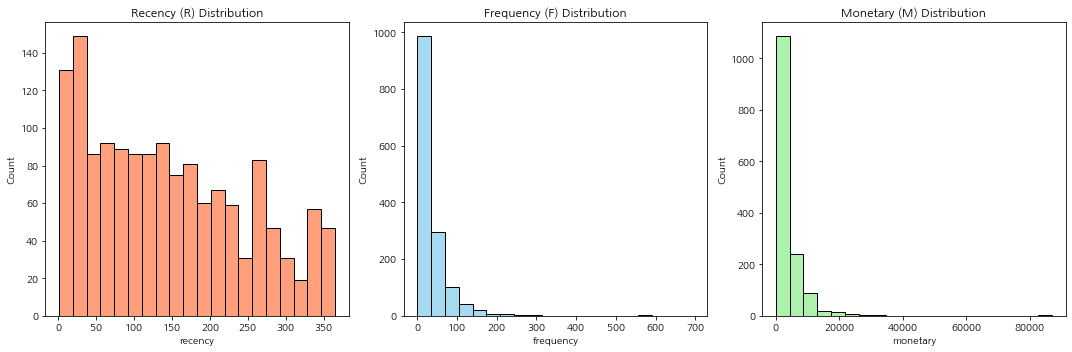

In [25]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
sns.histplot(rfm_df['recency'], bins=20, color='coral', edgecolor='black')
plt.title('Recency (R) Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm_df['frequency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Frequency (F) Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm_df['monetary'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Monetary (M) Distribution')

plt.tight_layout()
plt.show()

- F와 M은 매우 편향된 경향을 보이는 반면 R은 비교적 고르게 분포하고 있음
- F는 0~100회 구간에 가장 많이 분포하고 있음
- M은 0~2만원 구간에 가장 많이 분포하고 있음

### 3. R, F, M 점수 설정 및 고객 세분화 작업

#### (1) 5개의 등급으로 간격 동일하게 점수 할당하기(qcut 이용)

In [26]:
# R 값의 경우 수치가 커질수록 낮은 점수 부여(수치가 크면 구매한지 오래됐다는 의미)
r_labels = list(range(5, 0, -1))
f_labels = list(range(1, 6))
m_labels = list(range(1, 6))

interval = 5

r_cut = pd.qcut(rfm_df['recency'], interval, labels = r_labels)
f_cut = pd.qcut(rfm_df['frequency'], interval, labels = f_labels)
m_cut = pd.qcut(rfm_df['monetary'], interval, labels = m_labels)

In [27]:
# rfm_df에 각각의 점수 할당
rfm_df = rfm_df.assign(R_score = r_cut, F_score = f_cut, M_score = m_cut)

#### (2) 고객 세분화를 위한 사용자 정의 함수 생성하기

In [28]:
def classify_customer_segment(row):
    R, F, M = row['R_score'], row['F_score'], row['M_score']
    
    if R == 5 and F == 5 and M == 5:
        return '챔피언 고객'  # 가장 최근에 가장 자주 구매하고 지출이 많은 최고의 고객
    
    elif R >= 3 and F >= 3 and M >= 3:
        return '잠재 충성 고객'  # 평균 빈도를 보이고 상당한 금액을 지출한 최근 고객
    
    elif R >= 3 and F == 1 and M <= 2:
        return '신규 고객'  # 높은 최근성, 낮은 구매 빈도, 낮은 구매 금액
    
    elif R <= 3 and F >= 3 and M >= 3:
        return '잃을 수 있는 고객'  # 자주 구매하고 많은 금액을 지출했지만 최근에는 구매한 적이 없는 고객
    
    elif R <= 2 and F >= 3 and M >= 2:
        return '놓치면 안 되는 고객'  # 자주 방문하여 구매를 했으나 최근에는 방문이 뜸한 고객
    
    elif R <= 2 and 2 <= F <= 3 and 2 <= M <= 3:
        return '휴면 고객'          # 적은 금액을 소비하고 방문 빈도가 낮으며 오래 전에 방문한 고객     
    
    elif R <= 2 and F <= 2 and M <= 2:
        return '이탈 고객'          # 세 가지 수치 모두 가장 낮은 고객
    
    else:
        return '기타'

rfm_df['Customer_Segment'] = rfm_df.apply(classify_customer_segment, axis=1)

#### (3) 고객 세분화 결과 시각화

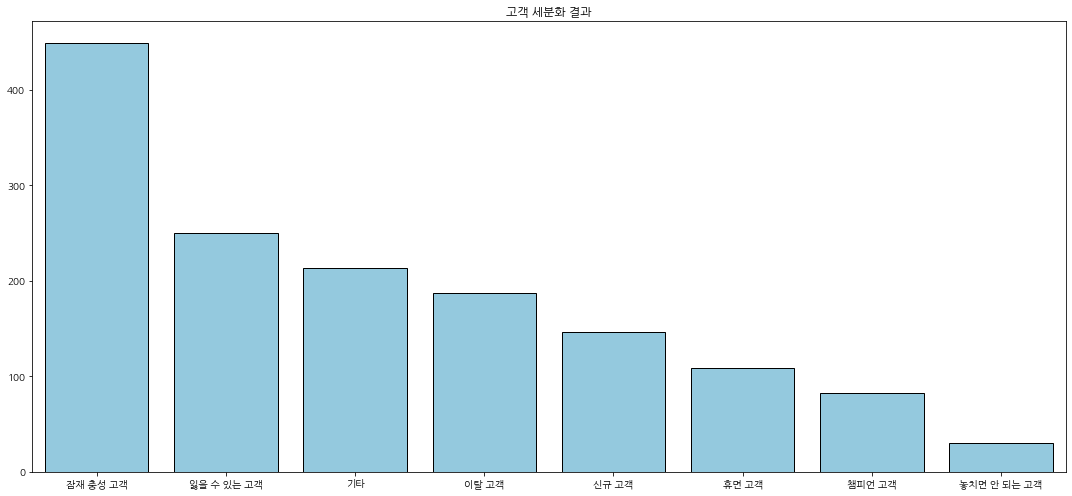

In [29]:
# RFM_segment 시각화
plt.figure(figsize = (15, 7))

# segment 값을 기준으로 내림차순 정렬
seg_order = rfm_df['Customer_Segment'].value_counts().index
sns.countplot(data = rfm_df, x = 'Customer_Segment', color = 'skyblue', order = seg_order, edgecolor = 'black')
plt.xlabel('')
plt.ylabel('')
plt.title('고객 세분화 결과')
plt.tight_layout()
plt.show()